**IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**READING DATASET**

In [2]:


data = pd.read_csv('/content/BanweatherOutlli.csv', index_col=None, header=0)
data.head()


,Month,Year,tem,rain
0,1,1901,16.9760,18.5356
1,2,1901,19.9026,16.2548
2,3,1901,24.3158,70.7981
3,4,1901,28.1834,66.1616
4,5,1901,27.8892,267.2150


In [3]:

data.head()
print(f"Date range of gold prices available from -{data.loc[:, 'Year'].min()} to {data.loc[:, 'Year'].max()}")
date=pd.date_range(start='1/1/1901',end='11/1/2023',freq='M')
date

data.head()
data['Date']=date
data.drop(columns='Year',inplace=True)
data.drop(columns='Month',inplace=True)

data.head()
data.drop('tem',axis=1,inplace=True) #  for getting prediction for temperature
data


Date range of gold prices available from -1901 to 2023


,rain,Date
0,18.535600,1901-01-31
1,16.254800,1901-02-28
2,70.798100,1901-03-31
3,66.161600,1901-04-30
4,267.215000,1901-05-31
...,...,...
1469,299.915166,2023-06-30
1470,353.399033,2023-07-31
1471,421.058714,2023-08-31
1472,306.090925,2023-09-30


In [4]:
data['Date']

0      1901-01-31
1      1901-02-28
2      1901-03-31
3      1901-04-30
4      1901-05-31
          ...    
1469   2023-06-30
1470   2023-07-31
1471   2023-08-31
1472   2023-09-30
1473   2023-10-31
Name: Date, Length: 1474, dtype: datetime64[ns]

**RESCALING DATA**

In [5]:
from astropy.time import Time


data['Date'] = Time(data['Date']).mjd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
data['rain_scaled'] = scaler.fit_transform(data[['rain']])
data

/usr/local/lib/python3.10/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 707 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


,rain,Date,rain_scaled
0,18.535600,15415.0,0.018315
1,16.254800,15443.0,0.016062
2,70.798100,15474.0,0.069957
3,66.161600,15504.0,0.065376
4,267.215000,15535.0,0.264041
...,...,...,...
1469,299.915166,60125.0,0.296353
1470,353.399033,60156.0,0.349202
1471,421.058714,60187.0,0.416058
1472,306.090925,60217.0,0.302455


In [7]:
data.drop('rain',inplace=True,axis=1)
data

,Date,rain_scaled
0,15415.0,0.018315
1,15443.0,0.016062
2,15474.0,0.069957
3,15504.0,0.065376
4,15535.0,0.264041
...,...,...
1469,60125.0,0.296353
1470,60156.0,0.349202
1471,60187.0,0.416058
1472,60217.0,0.302455


In [8]:
split_point = int(len(data) * 0.8)

# Split the data into training and testing sets
train_data = data[:split_point]
test_data = data[split_point:]

# Print the lengths of the training and testing sets
print("Training data length:", len(train_data))
print("Testing data length:", len(test_data))

Training data length: 1179
Testing data length: 295


In [9]:
X=data
y=data['rain_scaled']

In [10]:
print(X)
print(y)

         Date  rain_scaled
0     15415.0     0.018315
1     15443.0     0.016062
2     15474.0     0.069957
3     15504.0     0.065376
4     15535.0     0.264041
...       ...          ...
1469  60125.0     0.296353
1470  60156.0     0.349202
1471  60187.0     0.416058
1472  60217.0     0.302455
1473  60248.0     0.316969

[1474 rows x 2 columns]
0       0.018315
1       0.016062
2       0.069957
3       0.065376
4       0.264041
          ...   
1469    0.296353
1470    0.349202
1471    0.416058
1472    0.302455
1473    0.316969
Name: rain_scaled, Length: 1474, dtype: float64


**TRAIN & TEST DATA**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1179, 2)
(295, 2)
(1179,)
(295,)


**BUILDING STACK MODEL**


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor



# Step 3: Initialize base models
et = ExtraTreesRegressor()  # Extra Trees Regressor
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

# Step 4: Initialize the Stacking Regressor
estimators = [('et', et), ('rf', rf), ('dt', dt)]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())

# Step 5: Train the Stacking Regressor
stacking_regressor.fit(X_train, y_train)

# Step 6: Evaluate the Stacking Regressor
print("Stacking Regressor R-squared:", stacking_regressor.score(X_test, y_test))


Stacking Regressor R-squared: 0.9999874702787976


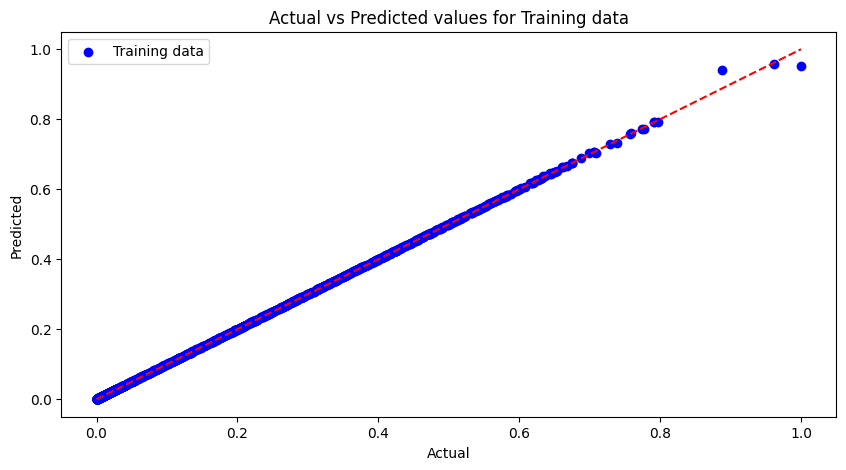

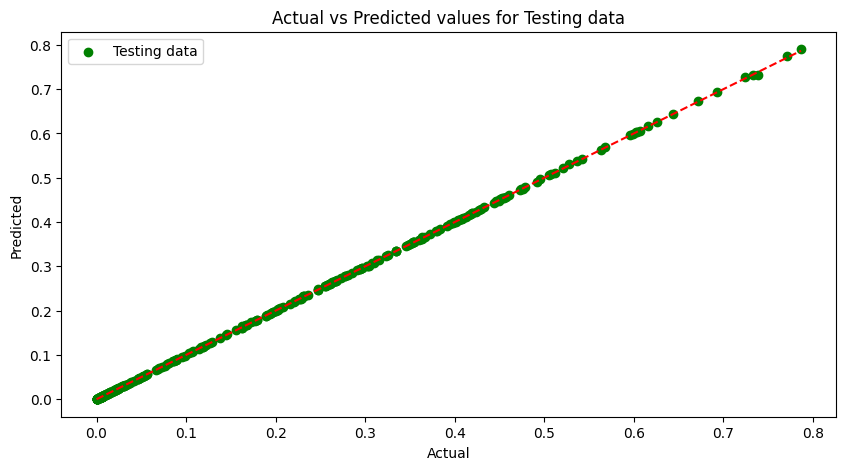

In [18]:
import matplotlib.pyplot as plt

# Make predictions on the training and testing data
y_train_pred = stacking_regressor.predict(X_train)
y_test_pred = stacking_regressor.predict(X_test)

# Plot actual vs predicted values for training data
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values for Training data')
plt.legend()
plt.show()

# Plot actual vs predicted values for testing data
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='green', label='Testing data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values for Testing data')
plt.legend()
plt.show()